## SVM is used for classification as well 

it is important to see the trade-off if the data is not linearly separable.

with a parameter C i can see if i want a wider support vectors (low C)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR # Regression
from sklearn.metrics import mean_squared_error

In [3]:
iris = datasets.load_iris()
# now pull train and test

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
df = pd.DataFrame(iris.data,columns =  iris.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Extract train and test sets

X = iris['data'][:,(2,3)]                    # i want all lines , but only petal length and petal width
y = (iris['target'] == 2).astype(np.float64) # This is the iris virginica , a true-false statement

In [8]:
# Now , before making any model i should make a pre processing .Thus i will create a Pipeline for making the pre processing and the model


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc',LinearSVC(C=1, loss='hinge'))
])

pipeline.fit(X,y)



Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [9]:
pipeline.predict([[5.5,1.7]])

array([1.])

The output is the a prob of each class like the logsitic regression classifier

# SVM do both classification and regression (Support vector regression)

Instead of finding the hyperplan that separates the classes. SVR find the functions that 

1. approximates the data as closely as possible 
2. keep a margin of errors with (E)
3. Penalize points that fall OUTSIDE the margin 

so , for a regression it tries to find the function that keeps most data Within a tube of radius E 

In [14]:
# First i will load the data

data = fetch_california_housing()

X = data.data
y = data.target

In [23]:
# Split into training and testing sets

X_train , X_test, y_train ,y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [24]:
# Scale the features since SVM is sensitive to feature scale

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit calculates mean and desvio padrao of each feature  -> Only on train
# Transform use these values to scale new data           -> on test
# fit_transform make both



In [18]:
# Train the SVM regreessor

svr = SVR(kernel = 'rbf', C=10, epsilon = 0.2)   # C is the regularization parameter , epsilon size of the tube of regression line
svr.fit(X_train_scaled,y_train)

SVR(C=10, epsilon=0.2)

In [25]:
y_pred = svr.predict(X_test_scaled)      # So i will try to predict with the test set now
mse = mean_squared_error(y_test,y_pred)  # see the error
print("Mean Square Error: ", mse)

Mean Square Error:  0.3212700746234452


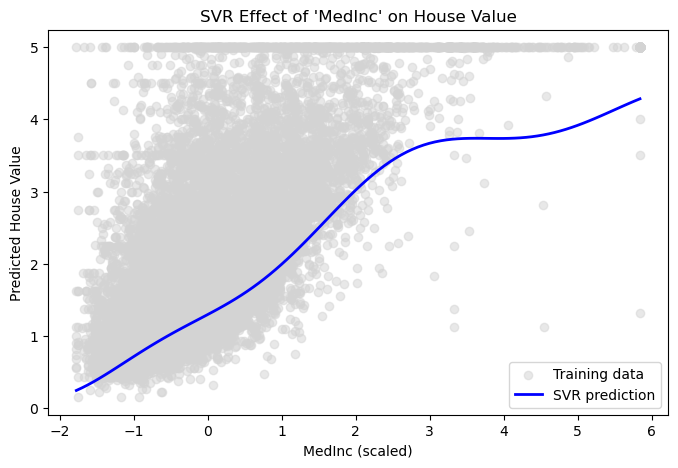

In [26]:
# I want to see feature 0 
feature_idx = 0
feature_name = data.feature_names[feature_idx]

# keep other fixed
X_mean = X_train_scaled.mean(axis=0)


 # 100 copies of the means
X_plot = np.tile(X_mean, (100, 1)) 

# Variation of the feature , 100 times
X_plot[:, feature_idx] = np.linspace(
    X_train_scaled[:, feature_idx].min(),
    X_train_scaled[:, feature_idx].max(),
    100
)


# predict
y_plot = svr.predict(X_plot)

# Plot 
plt.figure(figsize=(8,5))
plt.scatter(X_train_scaled[:, feature_idx], y_train, color='lightgray', alpha=0.5, label='Training data')
plt.plot(np.linspace(X_train_scaled[:, feature_idx].min(), X_train_scaled[:, feature_idx].max(), 100),
         y_plot, color='blue', linewidth=2, label='SVR prediction')
plt.title(f"SVR Effect of '{feature_name}' on House Value")
plt.xlabel(f"{feature_name} (scaled)")
plt.ylabel("Predicted House Value")
plt.legend()
plt.show()

# So if i change only medinc and keep all other features fix ,this will happen